In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from load_data import load_categorical_data
#from load_data import load_categorical_more_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
import time
import seaborn as sns
from xgboost import XGBRegressor, plot_tree, plot_importance
from scipy import stats

In [36]:
import openpyxl 
import os

In [3]:
# def MinMaxNormal(df):
#     normalized_df=(df-df.min())/(df.max()-df.min())
#     return normalized_df

In [4]:
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true=np.array(y_true)
#     y_pred=np.array(y_pred)
#     MSPE = (sum((MinMaxNormal(y_true)-MinMaxNormal(y_pred))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
#     MSPE = MSPE*100
#     return np.abs(MSPE)

In [5]:
# """
# Use Decision Tree to fit the relationship between 
# homeless_real_value and other variables, except 
# no_longer_homeless, prevention_duty, and relief duty.
# """

# #Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2020,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

# #affordableRent_start,social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [6]:
# data_table=categorical_data.drop(labels='Local',axis=1)
# data_table=data_table.drop(labels='Local_Authority_code',axis=1)
# data_table=data_table.drop(labels='Local_Authority_name',axis=1)
# data_table=data_table.drop(labels='Homeless_(including_intentionally_homeless)',axis=1)
# data_table=data_table.drop(labels='Threatened_with_homelessness_within_56_days_Prevention_duty_owed',axis=1)
# data_table=data_table.drop(labels='Homeless_Relief_duty_owed4',axis=1)
# data_table=data_table.drop(labels='Total_households_with_support_needs',axis=1)
# data_table=data_table.drop(labels='Total_secured_accommodation',axis=1)
# data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
# data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
# #data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
# #data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
# #data_table=data_table.drop(labels='Affordable_Home_Ownership(Starts_on_Site)',axis=1)
# #data_table=data_table.drop(labels='Affordable_Home_Ownership(Completions)',axis=1)
# #data_table=data_table.drop(labels='Market(Starts_on_Site)',axis=1)
# #data_table=data_table.drop(labels='Market(Completions)',axis=1)
# #data_table=data_table.drop(labels='C_D_property_counts',axis=1)
# #data_table=data_table.drop(labels='E_F_property_counts',axis=1)
# #data_table=data_table.drop(labels='G_H_property_counts',axis=1)
# #data_table=data_table.drop(labels='median_houses_2020',axis=1)
# #data_table=data_table.drop(labels='median_earning_2020',axis=1)
# #data_table=data_table.drop(labels='ratio_by_medians_2020',axis=1)
# data_table=data_table.drop(labels='Total_Affordable(Starts_on_Site)',axis=1)
# data_table=data_table.drop(labels='Total_Affordable(Completions)',axis=1)
# data_table=data_table.drop(labels='Total(Starts_on_Site)',axis=1)
# data_table=data_table.drop(labels='Total(Completions)',axis=1)
# #data_table=data_table.drop(labels='lower_quatile_houses_2020',axis=1)
# #data_table=data_table.drop(labels='lower_quatile_earning_2020',axis=1)

In [37]:
raw_data = pd.read_excel(r"./Data/all_in_one_Categorical_imputed.xlsx")

raw_data = raw_data.drop(columns=['Local', 
                                  'Local_Authority_code', 
                                  'Local_Authority_name',
                                  'Homeless_(including_intentionally_homeless)',
                                  'Threatened_with_homelessness_within_56_days_Prevention_duty_owed',
                                  'Homeless_Relief_duty_owed4',
                                  'Total_households_with_support_needs',
                                  'Total_secured_accommodation',
                                  'Intermediate_Rent(Completions)',
                                  'Intermediate_Rent_(Starts_on_Site)',
                                  'Total_Affordable(Starts_on_Site)',
                                  'Total_Affordable(Completions)',
                                  'Total(Starts_on_Site)',
                                  'Total(Completions)'])
                                 
# raw_data = raw_data.drop(columns=['Number_of_households_in_area4(000s)'])

In [5]:
# for i in range(raw_data.columns.shape[0]):
#     sns.kdeplot(raw_data[raw_data.columns[i]])
#     plt.show()

In [6]:
# # pt = PowerTransformer(standardize=False)
# for i in range(raw_data.columns.shape[0]):
# #     this_data = (raw_data[raw_data.columns[i]].values + 0.1).reshape(-1,1)
# #     this_data = pt.fit_transform(this_data)
    
# #     this_data_df = pd.DataFrame(this_data, columns=[raw_data.columns[i]])
# #     sns.kdeplot(this_data_df[raw_data.columns[i]])
#     sns.kdeplot(np.log(raw_data[raw_data.columns[i]] + 0.1) )
#     plt.show()

Skewness: 2.928491
Kurtosis: 12.620908


<AxesSubplot:xlabel='Total_owed_a_prevention_or_relief_duty', ylabel='Density'>

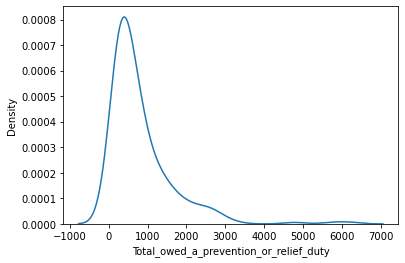

In [7]:
this_column = raw_data[raw_data.columns[0]]

mu = this_column.mean()
std = this_column.std()

# stats.kstest(this_column, 'norm', (mu, std))
# stats.normaltest(this_column, nan_policy='propagate')
print("Skewness: %f" % this_column.skew())
print("Kurtosis: %f" % this_column.kurt())
sns.kdeplot(this_column)

In [8]:
# sns.pairplot(data_table)

In [9]:
# SelectKBest(chi2, k=8).fit_transform(feature_space, feature_class)

In [10]:

# data_scaled = StandardScaler().fit_transform(data_table.values)
# data_scaled_df = pd.DataFrame(data_scaled, index=data_table.index, columns=data_table.columns)


In [30]:
X = raw_data.iloc[:, raw_data.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
y = raw_data.iloc[:, raw_data.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

In [ ]:
# X = importance = X.rename(columns={'Social_Rent(Completions)':'Completed Social Rent Affordable Housing',
#                                     'Market(Starts_on_Site)': 'Starting Market Supplied Affordable Housing',
#                                     'Social_Rent_(Starts_on_Site)':'Starting Social Rent Affordable Housing',
#                                     'median_houses_2020': 'Median Local House Prices',
#                                     'E_F_property_counts': 'Number of Houses Valued from \xA388k to \xA3160k by the Council Tax Scheme',
#                                     'lower_quatile_houses_2020': 'Lower Quartile Local House Prices',
#                                     'ratio_by_medians_2020': 'Median Income and House Prices based Housing Affordablity Ratio',
#                                     'ratio_by_lower_quatile_2020':'Lower Quartile Income and House Prices based Housing Affordablity Ratio',
#                                     'G_H_property_counts':'Number of Houses Valued Over \xA3160k by the Council Tax Scheme',
#                                     'Market(Completions)': 'Completed Market Supplied Affordable Housing',
#                                     'lower_quatile_earning_2020':'Lower Quartile Local Household Annual Income',
#                                     'Affordable_Rent(Starts_on_Site)': 'Starting Affordable Rent Housing',
#                                     'A_B_property_counts':'Number of Houses Valued from \xA30k to \xA352k by the Council Tax Scheme',
#                                     'median_earning_2020': 'Median Local Household Annual Income',
#                                     'Affordable_Rent(Completions)':'Competed Affordable Rent Housing',
#                                     'Size_of_social_housing_waiting_list_2020':'Size of the social housing waiting list by 2020',
#                                     '2020_Total_Lettings': 'Confirmed Number of Social Housing Let to Households by 2020',
#                                     'C_D_property_counts': 'Number of Houses Valued from \xA352k to \xA388k by the Council Tax Scheme',
#                                     'Affordable_Home_Ownership(Starts_on_Site)':  'Starting Affordable Home Ownership Houses',
#                                     'Affordable_Home_Ownership(Completions)':'Competed Affordable Home Ownership Houses',
#                                     'Number_of_households_in_area4(000s)':'Number of Households Recorded in Each Local Authority Council'})


In [40]:
X = X.rename(columns={'Social_Rent(Completions)':'Social Rent Affordable (Completed)',
                                    'Market(Starts_on_Site)':'Market Supplied Affordable (Started)',
                                    'Social_Rent_(Starts_on_Site)':'Social Rent Affordable (Started)',
                                    'median_houses_2020':'Median House Prices',
                                    'E_F_property_counts':'Properties of value \xA388k-\xA3160k',
                                    'lower_quatile_houses_2020':'Lower Quartile House Prices',
                                    'ratio_by_medians_2020':'Affordablity Ratio Medians',
                                    'ratio_by_lower_quatile_2020':'Housing Affordablity Ratio Lower Quartile',
                                    'G_H_property_counts':'Properties of value \xA3160k+',
                                    'Market(Completions)':'Market Supplied Affordable (Completed)',
                                    'lower_quatile_earning_2020':'Lower Quartile Household Income',
                                    'Affordable_Rent(Starts_on_Site)':'Affordable Rent Housing (Started)',
                                    'A_B_property_counts':'Properties of value \xA30k-\xA352k',
                                    'median_earning_2020': 'Median Household Income',
                                    'Affordable_Rent(Completions)':'Affordable Rent Housing (Completed)',
                                    'Size_of_social_housing_waiting_list_2020':'Social Housing Waiting List',
                                    '2020_Total_Lettings':'Social Housing Lettings',
                                    'C_D_property_counts':'Properties of value \xA352k-\xA388k',
                                    'Affordable_Home_Ownership(Starts_on_Site)':'"Ownership" Houses (Started)',
                                    'Affordable_Home_Ownership(Completions)':'"Ownership" Houses (Completed)',
                                    'Number_of_households_in_area4(000s)':'Number of Households in Local Area'})


In [41]:
X.columns

Index(['Number of Households in Local Area', 'Social Housing Waiting List',
       'Social Housing Lettings', 'Affordable Rent Housing (Started)',
       'Social Rent Affordable (Started)', '"Ownership" Houses (Started)',
       'Affordable Rent Housing (Completed)',
       'Social Rent Affordable (Completed)', '"Ownership" Houses (Completed)',
       'Market Supplied Affordable (Started)',
       'Market Supplied Affordable (Completed)',
       'Properties of value £0k-£52k', 'Properties of value £52k-£88k',
       'Properties of value £88k-£160k', 'Properties of value £160k+',
       'Median House Prices', 'Median Household Income',
       'Affordablity Ratio Medians', 'Lower Quartile House Prices',
       'Lower Quartile Household Income',
       'Housing Affordablity Ratio Lower Quartile'],
      dtype='object')

## Single run

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

xgb_model = XGBRegressor().fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8312172872252293


In [22]:
xgb_model.feature_importances_

array([0.19739126, 0.00873716, 0.01037131, 0.01017766, 0.01986356,
       0.00537049, 0.00636432, 0.12693252, 0.16461413, 0.00153601,
       0.13015419, 0.25855666, 0.01056936, 0.01106844, 0.00683473,
       0.00071065, 0.0137112 , 0.00387807, 0.00034673, 0.01012283,
       0.00268869], dtype=float32)

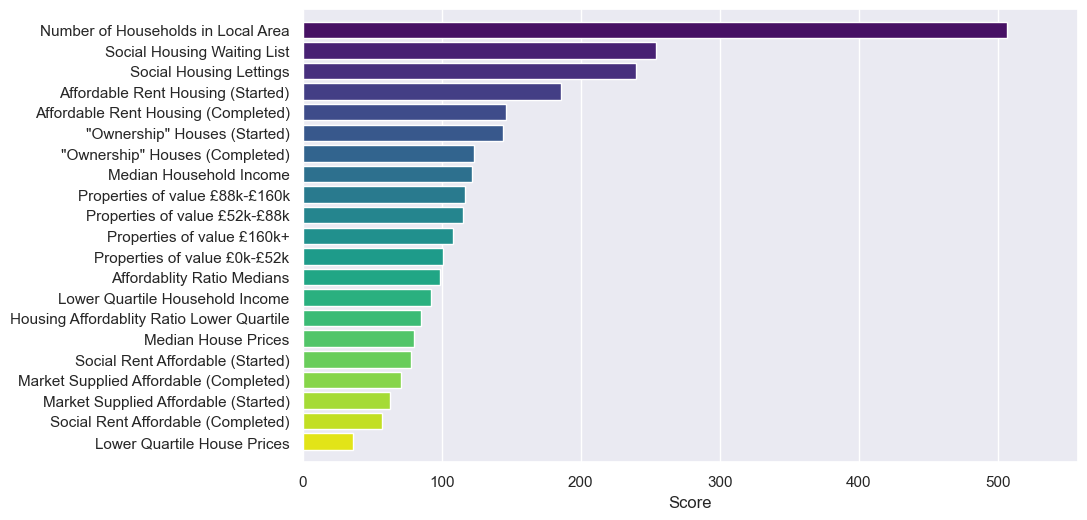

In [59]:
# colors = sns.color_palette('crest', X.shape[1]).as_hex()
colors = sns.color_palette('viridis_r', X.shape[1]).as_hex()

sns.set(rc={'figure.figsize':(10, 6)})
sns.set_style("darkgrid")
plt.rcParams["figure.dpi"] = 100

fig, ax = plt.subplots()
plot_importance(xgb_model, 
                importance_type='weight', 
                height=0.8, 
                color=colors, 
                show_values=False, 
                xlabel='Score',
                ylabel="",
                title="",
                ax=ax)
ax.yaxis.grid(False)
# ax.xaxis.grid(True)

In [21]:
# colors = sns.color_palette('PuBu', len(importance['feature'])).as_hex()

# ax = sns.barplot(x="importance", y="feature", palette='viridis_r', data=importance)

In [60]:
# importances_values = xgb_model.feature_importances_
# importances = pd.DataFrame(importances_values, columns=["importance"])
# feature_data = pd.DataFrame(X_train.columns, columns=["feature"])
# importance = pd.concat([feature_data, importances], axis=1)

# importance = importance.sort_values(["importance"], ascending=True)
# # importance["importance"] = (importance["importance"] * 1000).astype(float)
# importance = importance.sort_values(["importance"])
# importance.set_index('feature', inplace=True)


# importance[].plot.barh(color='#527aa0', rot=0, figsize=(8, 8))
# plt.legend(loc="lower right")
# plt.show()

## Averaged Result after 20 Runs

In [40]:
accuracy_list = []

importances = pd.DataFrame(X_train.columns, columns=["feature"])
features = pd.DataFrame(X_train.columns, columns=["feature"])

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)

    xgb_model = XGBRegressor().fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    importances_values = xgb_model.feature_importances_
    
    columns_name = "importance" + str(i)
    importance = pd.DataFrame(importances_values, columns=[columns_name])
    importances = pd.concat([importance, importances], axis=1)
    importances = importances.sort_values([columns_name], ascending=True)
    
#     thisImportance =  pd.concat([features, importance], axis=1)
    
#     thisImportance = thisImportance.sort_values([columns_name], ascending=True)
#     thisImportance[columns_name] = (thisImportance[columns_name]).astype(float)

#     thisImportance[-10:].plot.barh(x='feature', y=columns_name, color=#527aa0, rot=0, figsize=(8, 8))
#     plt.legend(loc="lower right")
#     plt.show()


In [43]:
print("The mean r-2 score is %f" %np.mean(accuracy_list))
accuracy_list

The mean r-2 score is 0.542388


[0.8629855742057964,
 0.4392368158006833,
 0.4263118226679963,
 0.16045022181520285,
 0.4885716871558424,
 0.425610656134527,
 0.6999357628360109,
 0.6321852299518422,
 0.4537844178724749,
 0.7111428525716683,
 0.4673685256476222,
 0.6727829322694101,
 0.4834299368085715,
 0.5947547140947305,
 0.5977001032894259,
 0.6208545150976574,
 0.3901404305579975,
 0.4206557185830757,
 0.5843935397054623,
 0.7154692187633417]

In [26]:
# importances_mean = importances.drop(columns='feature').mean(axis = 1)

# features = pd.DataFrame(X_train.columns, columns=["feature"])
# importances_mean = pd.DataFrame(importances_mean, columns=["importances_mean"])
# importance_f = pd.concat([features, importances_mean], axis=1)

In [27]:
# # thisImportance = thisImportance.sort_values([columns_name], ascending=True)
# importance_f["importances_mean"] = (importance_f["importances_mean"] ).astype(float)
# importance_f = importance_f.sort_values(["importances_mean"], ascending=True)

# importance_f.plot.barh(x='feature', y="importances_mean", color='#527aa0', rot=0, figsize=(8, 8))
# plt.legend(loc="lower right")
# plt.show()